<a href="https://colab.research.google.com/github/yuukun123/Python/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# T√πy ch·ªânh ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

Mounted at /content/drive


In [3]:
# ƒê∆∞·ªùng d·∫´n file
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx"
xls = pd.ExcelFile(file_path)

# **clean DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx**

h√†m l·ªçc d·ªØ li·ªáu sheet ExpressionAverage


In [ ]:
# def clean_expression_sheet(df, required_cols=["Expression"]):
#     # X√≥a c·ªôt kh√¥ng t√™n
#     df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

#     # X√≥a d√≤ng thi·∫øu c·ªôt b·∫Øt bu·ªôc
#     df = df.dropna(subset=required_cols)

#     # Lo·∫°i b·ªè c√°c bi·ªÉu c·∫£m kh√¥ng d√πng
#     df = df[~df["Expression"].str.lower().str.contains("pms13")]
#     df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

#     # C√°c c·ªôt c·∫ßn √©p ki·ªÉu v√† x·ª≠ l√Ω NaN
#     numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
#     for col in numeric_cols:
#         if col in df.columns:
#             df[col] = df[col].replace([".", ""], np.nan)
#             df[col] = pd.to_numeric(df[col], errors="coerce")
#             df[col] = df[col].fillna(df[col].mean())

#     # Lo·∫°i b·ªè c√°c d√≤ng li√™n quan face gen pro
#     df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

#     df = df.infer_objects(copy=False)

#     return df


In [18]:
def clean_expression_sheet(df, required_cols=["Expression"]):
  # X√≥a c·ªôt kh√¥ng t√™n
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # X√≥a d√≤ng thi·∫øu c·ªôt b·∫Øt bu·ªôc
  df = df.dropna(subset=required_cols)

  # Lo·∫°i b·ªè c√°c bi·ªÉu c·∫£m kh√¥ng d√πng
  df = df[~df["Expression"].str.lower().str.contains("pms13")]
  df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

  # ‚úÖ Lo·∫°i b·ªè c√°c d√≤ng li√™n quan face gen pro TR∆Ø·ªöC ƒë·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn mean
  df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

  # C√°c c·ªôt c·∫ßn √©p ki·ªÉu v√† x·ª≠ l√Ω NaN
  numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
  for col in numeric_cols:
      if col in df.columns:
          df[col] = df[col].replace([".", ""], np.nan)
          df[col] = pd.to_numeric(df[col], errors="coerce")
          df[col] = df[col].fillna(df[col].mean())

  df = df.loc[:, ~df.columns.str.contains("ConfusionRating")]
  df = df.loc[:, ~df.columns.str.contains("ConfusionComp")]

  df = df.infer_objects(copy=False)
  return df


ExpressionAverages

In [19]:
df_expr = pd.read_excel(xls, sheet_name="ExpressionAverages")
# print(df_expr.dtypes)
df_expr = clean_expression_sheet(df_expr)

print(df_expr.to_string())

   Expression Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp
0         AJ2      FirstPass    5.052632    2.894737     2.078947       2.421053         1.210526       3.131579        2.131579      1.736842  2.033766e-06  9.570970e-08  3.064130e-07   1.954638e-12  1.372440e-04  6.551333e-07  3.610371e-09
3         AK5      FirstPass    4.650000    2.225000     2.725000       2.575000         1.275000       2.275000        1.725000      2.375000  7.102722e-09  4.114614e-05  2.849266e-06   6.427339e-13  3.038153e-08  1.352565e-10  1.223136e-07
6         EF5      FirstPass    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06
9         KM4      FirstPass    

<ipython-input-18-63b2d55437d4>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


h√†m l·ªçc d·ªØ li·ªáu sheet slider_face_gen

In [70]:
import numpy as np
import pandas as pd

def clean_slider_facegen_sheet(df):
    # X√≥a c√°c c·ªôt kh√¥ng t√™n
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

    # Lo·∫°i b·ªè c·ªôt 'PMS13' n·∫øu c√≥
    if "PMS13" in df.columns:
        df = df.drop(columns=["PMS13"])

    # L∆∞u l·∫°i danh s√°ch Slider g·ªëc
    slider_labels = df["Slider"].values

    # X·ª≠ l√Ω c√°c c·ªôt s·ªë
    numeric_cols = df.columns.drop("Slider")
    for col in numeric_cols:
        df[col] = df[col].replace([".", ""], np.nan)
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].mean())

    df = df.infer_objects(copy=False)

    # B√¢y gi·ªù transpose
    df = df.set_index("Slider").transpose()

    # Sau khi transpose:
    # Reset index ƒë·ªÉ 'Slider' th√†nh 1 c·ªôt
    df.reset_index(inplace=True)

    # ƒê·ªïi t√™n c·ªôt ƒë·∫ßu ti√™n th√†nh 'Slider'
    df = df.rename(columns={"index": "Slider"})

    # >>> TH√äM B∆Ø·ªöC T·∫†O ExpressionKey <<<
    df["ExpressionKey"] = df["Slider"].astype(str).str.strip().str.upper()

    return df


Slider_face_gen

In [73]:
df_slider_mo = pd.read_excel(xls, sheet_name="Sliders_FaceGenModeller")
# print(df_slider_mo.dtypes)
df_slider_mo = clean_slider_facegen_sheet(df_slider_mo)
print(df_slider_mo.to_string())

Slider Slider    Anger   Disgust      Fear   Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  BrowInLeft  BrownInRight  BrowUpLeft  BrowUpRight   EarsOut  EpicanthicFold  EyeSquintLeft  EyeSquintRight  LookDown  LookLeft  LookRight    LookUp       aah     B,M,P   big aah   ch,J,sh     D,S,T        ee        eh       F,V         i         K         N        oh     ooh,Q         R        th         W ExpressionKey
0         AK5  0.22000  0.480000  0.551818  0.83     0.551818   0.551818  0.551818   0.560000    0.570000      1.000000       1.000000    0.551818      0.551818    0.551818     0.551818  0.551818        0.630000       0.551818        0.551818  0.551818  0.551818   0.551818  0.551818  0.090000  0.551818  0.551818  0.500000  0.551818  0.551818  0.551818  0.551818  0.551818  0.551818  0.551818  0.190000  0.551818  0.551818  0.551818  0.551818           AK5
1         AJ2  0.43800  0.210000  1.000000  1.00     0.438000   0.800000  0.438000  

<ipython-input-70-b690d0cf75c9>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


h√†m l·ªçc first_pass_norming

In [ ]:
# def clean_first_pass_norming(df):
#     import pandas as pd


#     # 1. Lo·∫°i c·ªôt ch·ª©a 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Lo·∫°i b·ªè c√°c c·ªôt nh√¢n kh·∫©u h·ªçc kh√¥ng c·∫ßn thi·∫øt
#     drop_cols = ['Race', 'SexualOrient', 'Political']
#     df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

#     # 3. T√¨m c√°c c·ªôt ƒë√°nh gi√° c·∫£m x√∫c
#     rating_cols = [c for c in df.columns if "emotion" in c.lower()]

#     # 4. T√≠nh t·ª∑ l·ªá thi·∫øu
#     miss_ratios = df[rating_cols].isna().mean()

#     # 5. Gi·ªØ l·∫°i c√°c c·ªôt c√≥ missing <= 0.4
#     keep_cols = miss_ratios[miss_ratios <= 0.4].index.tolist()
#     df = df[keep_cols + [col for col in df.columns if col not in rating_cols]]

#     # 6. Ph√¢n lo·∫°i c·ªôt theo m·ª©c ƒë·ªô thi·∫øu
#     small_missing = miss_ratios[miss_ratios < 0.05].index.tolist()
#     large_missing = miss_ratios[(miss_ratios >= 0.05) & (miss_ratios <= 0.4)].index.tolist()

#     # 7. Drop d√≤ng ch·ª©a missing < 5%
#     df = df.dropna(subset=small_missing)

#     # 8. ƒêi·ªÅn missing >= 5% b·∫±ng mode
#     for col in large_missing:
#         mode_val = df[col].mode().iat[0]
#         df[col] = df[col].fillna(mode_val).astype(int)

#     # 9. Reshape wide ‚Üí long format
#     id_vars = ['ResponseId', 'Age', 'Gender']
#     id_vars = [col for col in id_vars if col in df.columns]

#     long_df = df.melt(
#         id_vars=id_vars,
#         value_vars=keep_cols,
#         var_name="Item",
#         value_name="Rating"
#     )

#     # 10. T√°ch th√¥ng tin t·ª´ t√™n c·ªôt: ImageID, EmotionType, QuestionNumber
#     long_df[['ImageID', 'EmotionType', 'QuestionNum']] = long_df['Item'].str.extract(r'([A-Za-z0-9_]+)_([a-zA-Z0-9]+)_([0-9]+)')

#     # 11. X·ª≠ l√Ω ki·ªÉu d·ªØ li·ªáu
#     long_df['Rating'] = pd.to_numeric(long_df['Rating'], errors='coerce')
#     long_df['QuestionNum'] = pd.to_numeric(long_df['QuestionNum'], errors='coerce')

#     return long_df


In [ ]:
# def clean_first_pass_norming(df):
#     # 1. Lo·∫°i b·ªè c√°c c·ªôt ch·ª©a 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. B·ªè d√≤ng ƒë·∫ßu ti√™n (header m√¥ t·∫£)
#     df = df.drop(index=0).reset_index(drop=True)

#     # 3. T√¨m c√°c c·ªôt c·∫£m x√∫c
#     emotion_cols = [col for col in df.columns if "_emotion_" in col]

#     # 4. Chu·∫©n b·ªã metadata: Age, Gender
#     df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

#     df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
#     df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

#     # ‚úÖ Chu·∫©n h√≥a Gender: female = 0, male = 1
#     gender_map = {'female': 0, 'male': 1}
#     df_meta['Gender'] = df_meta['Gender'].map(gender_map)

#     # ‚úÖ X√≥a c√°c d√≤ng Gender kh√¥ng h·ª£p l·ªá (NaN)
#     df_meta = df_meta.dropna(subset=['Gender'])

#     # 5. Chuy·ªÉn v·ªÅ d·∫°ng long format
#     df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
#                       var_name='Image_ID', value_name='Emotion')

#     # 6. B·ªè c√°c d√≤ng kh√¥ng c√≥ nh√£n
#     df_long.dropna(subset=['Emotion'], inplace=True)

#     # 7. Tr√≠ch t√™n file ·∫£nh t·ª´ t√™n c·ªôt
#     df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
#     df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

#     # ‚úÖ 7.5. L·ªçc c√°c ·∫£nh c√≥ ExpressionKey h·ª£p l·ªá
#     valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
#     df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

#     # 8. ƒê·ªïi ki·ªÉu nh√£n c·∫£m x√∫c sang s·ªë
#     df_long['Emotion'] = df_long['Emotion'].astype(int)

#     # 9. Merge th√™m Age v√† Gender
#     df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

#     return df_long


In [22]:
def clean_first_pass_norming(df):
    # 1. Lo·∫°i b·ªè c√°c c·ªôt ch·ª©a 'pms13'
    df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

    # 2. B·ªè d√≤ng ƒë·∫ßu ti√™n (header m√¥ t·∫£)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. T√¨m c√°c c·ªôt c·∫£m x√∫c
    emotion_cols = [col for col in df.columns if "_emotion_" in col]

    # 4. Chu·∫©n b·ªã metadata: Age, Gender
    df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

    df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
    df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

    # ‚úÖ S·ª≠a 'm' th√†nh 'male' tr∆∞·ªõc khi map
    df_meta['Gender'] = df_meta['Gender'].replace({'m': 'male'})

    # ‚úÖ Chu·∫©n h√≥a Gender: female = 0, male = 1
    gender_map = {'female': 0, 'male': 1}
    df_meta['Gender'] = df_meta['Gender'].map(gender_map)

    # ‚úÖ X√≥a c√°c d√≤ng Gender kh√¥ng h·ª£p l·ªá (NaN)
    df_meta = df_meta.dropna(subset=['Gender'])

    # 5. Chuy·ªÉn v·ªÅ d·∫°ng long format
    df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
                      var_name='Image_ID', value_name='Emotion')

    # 6. B·ªè c√°c d√≤ng kh√¥ng c√≥ nh√£n
    df_long.dropna(subset=['Emotion'], inplace=True)

    # 7. Tr√≠ch t√™n file ·∫£nh t·ª´ t√™n c·ªôt
    df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
    df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

    # ‚úÖ 7.5. L·ªçc c√°c ·∫£nh c√≥ ExpressionKey h·ª£p l·ªá
    valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
    df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

    # 8. ƒê·ªïi ki·ªÉu nh√£n c·∫£m x√∫c sang s·ªë
    df_long['Emotion'] = df_long['Emotion'].astype(int)

    # 9. Merge th√™m Age v√† Gender
    df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

    return df_long


Fist_pass_norming

In [23]:
df_first = pd.read_excel(xls, sheet_name="FirstPassNorming")
df_first = clean_first_pass_norming(df_first)


print(df_first.to_string())
# df_first.info()
# df_first.head()


             ResponseId          Image_ID  Emotion ExpressionKey  ImageFile  Age  Gender
0     R_2zw5psM5CtFQKno    EF5_emotion_18        4           EF5    EF5.jpg   26     1.0
1     R_2Ua2Dc353v4cNGn    EF5_emotion_18        2           EF5    EF5.jpg   32     0.0
2     R_2YR34dGGiKYFi2y    EF5_emotion_18        7           EF5    EF5.jpg   64     0.0
3     R_BWYpKelNH9C8aRj    EF5_emotion_18        1           EF5    EF5.jpg   24     1.0
4     R_2an0MfrT5MWzwiQ    EF5_emotion_18        7           EF5    EF5.jpg   45     0.0
5     R_3PGE13wEeq6tIOT    EF5_emotion_18        1           EF5    EF5.jpg   21     1.0
6     R_1lzUZmKRQVzOpxD    EF5_emotion_18        6           EF5    EF5.jpg   39     1.0
7     R_31uzrii0srEgLi3    EF5_emotion_18        1           EF5    EF5.jpg   59     0.0
8     R_27U5GunQGBeN6FX    EF5_emotion_18        1           EF5    EF5.jpg   31     0.0
9     R_3oYotaD13IZxRGi    EF5_emotion_18        1           EF5    EF5.jpg   25     1.0
10    R_2B4ImrFXFEt8L

h√†m l·ªçc demographics

In [10]:
def clean_demographics(df):
    # 0. Gi·ªØ l·∫°i hai c·ªôt ƒë·∫ßu ti√™n (gi·∫£ s·ª≠ l√† c·ªôt ch·ª©a Age v√† Gender)
    df = df.iloc[:, :2]

    # 1. ƒê·∫∑t t√™n c·ªôt
    df.columns = ['Age', 'Gender']  # ƒê·∫∑t t√™n c·ªôt l√† "Age" v√† "Gender"

    # 2. X√≥a d√≤ng ƒë·∫ßu ti√™n (Age, Gender)
    df = df.drop(index=0).reset_index(drop=True)

    # # 3. Chu·∫©n h√≥a c·ªôt Gender: Female -> 0, Male -> 1, c√°c gi√° tr·ªã kh√°c -> NaN
    # df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
    # gender_map = {'female': 0, 'male': 1}
    # df['Gender'] = df['Gender'].map(gender_map).where(df['Gender'].isin(['female', 'male']), np.nan)

    return df

Demographics

In [13]:
df_demographics = pd.read_excel(xls, sheet_name="Demographics")
df_demographics = clean_demographics(df_demographics)
print(df_demographics.to_string())


   Age   Gender
0   25   Female
1   26     Male
2   49  Female 
3   32   Female
4   64   Female
5   36   Female
6   49     Male
7   32   Female
8   25     Male
9   24     Male
10  45   Female
11  32   Female
12  21     Male
13  39     Male
14  59   Female
15  31   Female
16  39     Male
17  31     Male
18  39     Male
19  48   Female
20  25     Male
21  40   Female
22  24     Male
23  40   Female
24  27     Male
25  36     Male
26  26   Female
27  35     Male
28  36     Male
29  26     Male
30  37     Male
31  61     Male
32  48     Male
33  31   Female
34  36   Female
35  33   Female
36  21   Female
37  46     Male
38  46     Male
39  40     Male
40  28   Female
41  44     Male
42  51   Female
43  45   Female
44  49   Female
45  31     Male
46  36     Male
47  20   Female
48  43     Male
49  23     Male
50  44   Female
51  43   Female
52  52   Female
53  34     Male
54  75     Male
55  40   Female
56  39   Female
57  40   Female
58  61   Female
59  27   Female
60  49     Male
61  40  

In [74]:
# Gi·∫£ s·ª≠ 4 DataFrame ƒë√£ t·ªìn t·∫°i: df_expr, df_slider_mo, df_first, df_demographics

# Ghi v√†o file Excel v·ªõi 4 sheet
with pd.ExcelWriter('/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx') as writer:
    df_expr.to_excel(writer, sheet_name='Expression', index=False)
    df_slider_mo.to_excel(writer, sheet_name='Slider_MO', index=False)
    df_first.to_excel(writer, sheet_name='First', index=False)
    df_demographics.to_excel(writer, sheet_name='Demographics', index=False)

print("save successful")


save successful


In [ ]:
# # ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c l∆∞u file CSV
# output_dir = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/'

# # L∆∞u t·ª´ng DataFrame v√†o file CSV ri√™ng
# df_expr.to_csv(output_dir + 'Expression.csv', index=False)
# df_slider_mo.to_csv(output_dir + 'Slider_MO.csv', index=False)
# df_first.to_csv(output_dir + 'First.csv', index=False)
# df_demographics.to_csv(output_dir + 'Demographics.csv', index=False)

In [ ]:
# # ƒê∆∞·ªùng d·∫´n t·ªõi file Excel nhi·ªÅu sheet
# xlsx_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"  # ho·∫∑c ƒë∆∞·ªùng d·∫´n ƒë·∫ßy ƒë·ªß n·∫øu c·∫ßn

# # ƒê·ªçc t·∫•t c·∫£ c√°c sheet v√†o dict
# all_sheets = pd.read_excel(xlsx_path, sheet_name=None)

# # G·ªôp t·∫•t c·∫£ sheet l·∫°i th√†nh m·ªôt DataFrame
# merged_df = pd.concat(all_sheets.values(), ignore_index=True)

# # L∆∞u ra Excel
# merged_df.to_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.xlsx", index=False)

# # L∆∞u ra CSV
# merged_df.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.csv", index=False)

In [ ]:
# import pandas as pd

# # ƒê·ªçc file Excel
# file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
# xls = pd.ExcelFile(file_path)

# # ƒê·ªçc c√°c sheet
# df_expression = xls.parse("Expression")
# df_slider = xls.parse("Slider_MO")
# df_first = xls.parse("First")
# df_demo = xls.parse("Demographics")

# # --- B∆∞·ªõc 1: Transpose Slider_MO ƒë·ªÉ ph√π h·ª£p v·ªõi Expression ---
# df_slider_t = df_slider.set_index('Slider').T.reset_index()
# df_slider_t = df_slider_t.rename(columns={'index': 'Expression'})

# # Merge v·ªõi Expression theo c·ªôt "Expression"
# df_merged_exp = pd.merge(df_expression, df_slider_t, on="Expression", how="left")

# # --- B∆∞·ªõc 2: G·ªôp Demographics v√†o First (gi·∫£ ƒë·ªãnh th·ª© t·ª± d√≤ng gi·ªëng nhau) ---
# df_first_demo = pd.concat([df_first.reset_index(drop=True), df_demo.reset_index(drop=True)], axis=1)

# # --- B∆∞·ªõc 3: Chu·∫©n h√≥a m√£ ·∫£nh t·ª´ ImageFile ƒë·ªÉ merge ---
# df_first_demo['ImageCode'] = df_first_demo['ImageFile'].str.extract(r'([A-Z]+\d+[a-zA-Z]?)')

# # Merge First + Demographics v·ªõi d·ªØ li·ªáu bi·ªÉu c·∫£m
# df_final = pd.merge(df_first_demo, df_merged_exp, left_on='ImageCode', right_on='Expression', how='left')

# # Xu·∫•t ho·∫∑c l∆∞u file n·∫øu c·∫ßn:
# # df_final.to_excel("merged_output.xlsx", index=False)

# # Hi·ªÉn th·ªã m·ªôt v√†i d√≤ng ƒë·ªÉ ki·ªÉm tra
# print(df_final.head())


In [80]:
import numpy as np
import pandas as pd

# ƒê∆∞·ªùng d·∫´n t·ªõi file Excel
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# ƒê·ªçc c√°c sheet
df_first = pd.read_excel(xls, sheet_name="First")
df_expression = pd.read_excel(xls, sheet_name="Expression")
df_slider_mo = pd.read_excel(xls, sheet_name="Slider_MO")

# X·ª≠ l√Ω First
df_first['ExpressionKey'] = df_first['ImageFile'].str.replace('.jpg', '', regex=False)
df_first['ExpressionKey'] = df_first['ExpressionKey'].str.strip().str.upper()

# X·ª≠ l√Ω Expression
df_expression['Expression'] = df_expression['Expression'].astype(str).str.strip().str.upper()

# X·ª≠ l√Ω Slider_MO
df_slider_mo = df_slider_mo.loc[:, ~df_slider_mo.columns.str.contains("^Unnamed")]
if "PMS13" in df_slider_mo.columns:
    df_slider_mo = df_slider_mo.drop(columns=["PMS13"])

# Th√™m ExpressionKey d·ª±a tr√™n c·ªôt 'Slider'
df_slider_mo["ExpressionKey"] = df_slider_mo["Slider"].astype(str).str.strip().str.upper()

# Merge First + Expression
df_merged = df_first.merge(df_expression, left_on='ExpressionKey', right_on='Expression', how='left')

# Merge th√™m v·ªõi Slider_MO
df_merged = df_merged.merge(df_slider_mo, on='ExpressionKey', how='left')

# C√°c c·ªôt mong mu·ªën (c√°c c·ªôt First + Expression + t·∫•t c·∫£ c√°c c·ªôt t·ª´ Slider_MO)
cols_to_keep = [
    'ImageFile', 'Emotion',  # t·ª´ First
    'PainRating', 'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
] + list(df_slider_mo.columns.drop(['Slider', 'ExpressionKey']))

df_final = df_merged[cols_to_keep].dropna(subset=['PainRating'])

# In th·ª≠ k·∫øt qu·∫£
print(df_final.to_string())

# L∆∞u l·∫°i
df_final.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv", index=False)


      ImageFile  Emotion  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp    Anger   Disgust      Fear   Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  BrowInLeft  BrownInRight  BrowUpLeft  BrowUpRight   EarsOut  EpicanthicFold  EyeSquintLeft  EyeSquintRight  LookDown  LookLeft  LookRight    LookUp       aah     B,M,P   big aah   ch,J,sh     D,S,T        ee        eh       F,V         i         K         N        oh     ooh,Q         R        th         W
0       EF5.jpg        4    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06  0.84000  0.870000  0.512500  1.00     0.460000   0.130000  0.512500   0.512500    0.512500   

In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv")
df.corr()

ValueError: could not convert string to float: 'EF5.jpg'

# **d√πng torch**

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# 1. Config
IMAGE_DIR = '/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller'
BATCH_SIZE = 32
NUM_EPOCHS = 20
LEARNING_RATE = 1e-4
MODEL_SAVE_PATH = 'pain_regression_model.pth'

# 2. Build List of All Images
# 2. Build List of All Images (FILTER .jpg/.png)
valid_image_extensions = ['.jpg', '.jpeg', '.png']

all_images = []
for folder_name in os.listdir(IMAGE_DIR):
    folder_path = os.path.join(IMAGE_DIR, folder_name)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            if os.path.splitext(img_name)[-1].lower() in valid_image_extensions:
                img_path = os.path.join(folder_path, img_name)
                all_images.append(img_path)

# Shuffle all images
random.shuffle(all_images)

# 3. Split into Train / Val / Test
train_imgs, test_imgs = train_test_split(all_images, test_size=0.3, random_state=42)
val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.5, random_state=42)

print(f"Train: {len(train_imgs)} images, Val: {len(val_imgs)}, Test: {len(test_imgs)}")

# 4. Custom Dataset
class PainDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Kh√¥ng t√¨m th·∫•y ·∫£nh: {img_path}")

        image = Image.open(img_path).convert('RGB')

        # TODO: hi·ªán t·∫°i kh√¥ng c√≥ ground truth PainRating n√™n ta fake random label ƒë·ªÉ test th√¥i
        label = random.uniform(0, 10)  # <-- g√°n random t·ª´ 0-10 n·∫øu b·∫°n kh√¥ng c√≥ label
        # N·∫øu c√≥ label th√¨ ph·∫£i vi·∫øt code l·∫•y label t·ª´ file ho·∫∑c t·ª´ t√™n ·∫£nh nh√©!

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 5. Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 6. DataLoaders
train_dataset = PainDataset(train_imgs, transform=transform)
val_dataset = PainDataset(val_imgs, transform=transform)
test_dataset = PainDataset(test_imgs, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 7. Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Regression output
model = model.to(device)

# 8. Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 9. Train
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Training Loss: {avg_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

# 10. Save model
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f'Model saved to {MODEL_SAVE_PATH}')


In [104]:
import random

# 1. Random ch·ªçn 1 ·∫£nh t·ª´ t·∫≠p test
random_test_image_path = random.choice(test_imgs)
print(f'üñºÔ∏è Randomly selected test image: {random_test_image_path}')

# 2. Predict
predicted_score = predict_image(model, random_test_image_path, transform, device)

print(f'‚úÖ Predicted Pain Rating: {predicted_score:.2f}')


üñºÔ∏è Randomly selected test image: /content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/LF10/LF10_PMS7.jpg
‚úÖ Predicted Pain Rating: 4.83


# **d√πng torch**

In [17]:
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ======================= #
# 1. Config
# ======================= #
IMAGE_DIR = '/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller'
CSV_PATH = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv'
BATCH_SIZE = 32
NUM_EPOCHS = 50
LEARNING_RATE = 1e-4
PATIENCE = 7  # Early stopping patience
MODEL_SAVE_PATH = 'best_pain_regression_model.pth'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ======================= #
# 2. Load CSV
# ======================= #
labels_df = pd.read_csv(CSV_PATH)[['ImageFile', 'PainRating']].dropna()
image_label_dict = dict(zip(labels_df['ImageFile'], labels_df['PainRating']))

# ======================= #
# 3. Load all data
# ======================= #
all_data = []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            image_file_part = img_name.split("_")[-1] if "_" in img_name else img_name
            if image_file_part in image_label_dict:
                label = image_label_dict[image_file_part]
                all_data.append((img_path, label))

print(f"‚úÖ Found {len(all_data)} valid images with labels.")

if len(all_data) == 0:
    raise ValueError("‚ùå No matched images found. Check CSV and filenames!")

# ======================= #
# 4. Split Train/Val/Test by Folder
# ======================= #
folder_names = list(set(os.path.basename(os.path.dirname(path)) for path, _ in all_data))
train_folders, test_folders = train_test_split(folder_names, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(test_folders, test_size=0.5, random_state=42)

def split_data(folders, data):
    return [(path, label) for path, label in data if os.path.basename(os.path.dirname(path)) in folders]

train_data = split_data(train_folders, all_data)
val_data = split_data(val_folders, all_data)
test_data = split_data(test_folders, all_data)

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

# ======================= #
# 5. Dataset and DataLoader
# ======================= #
class PainDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_loader = DataLoader(PainDataset(train_data, transform), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(PainDataset(val_data, transform), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(PainDataset(test_data, transform), batch_size=BATCH_SIZE, shuffle=False)

# ======================= #
# 6. Model
# ======================= #
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(DEVICE)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# ======================= #
# 7. Training Loop with EarlyStopping
# ======================= #
best_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{NUM_EPOCHS}] Training", leave=False)

    for inputs, targets in loop:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Check for improvement
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"\t‚úÖ Saved Best Model (Val Loss: {best_val_loss:.4f})")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"\t‚ö†Ô∏è No improvement for {epochs_no_improve} epochs.")

    if epochs_no_improve >= PATIENCE:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

print("Training finished.")
print(f"Best model saved at: {MODEL_SAVE_PATH}")

# ======================= #
# 8. Evaluation on Test Set
# ======================= #
print("\nüîç Evaluating best model on Test Set...")
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.eval()

test_loss = 0.0
with torch.no_grad():
    for inputs, targets in tqdm(test_loader, desc="Testing", leave=False):
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"üéØ Test MSE Loss: {avg_test_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


‚úÖ Found 128 valid images with labels.
Train: 88, Val: 16, Test: 24


Epoch [1/50] - Train Loss: 29.4208 | Val Loss: 28.6521
	‚úÖ Saved Best Model (Val Loss: 28.6521)


Epoch [2/50] - Train Loss: 21.9721 | Val Loss: 27.6190
	‚úÖ Saved Best Model (Val Loss: 27.6190)


Epoch [3/50] - Train Loss: 16.7632 | Val Loss: 22.2985
	‚úÖ Saved Best Model (Val Loss: 22.2985)


Epoch [4/50] - Train Loss: 12.9716 | Val Loss: 14.7530
	‚úÖ Saved Best Model (Val Loss: 14.7530)


Epoch [5/50] - Train Loss: 10.2058 | Val Loss: 9.5101
	‚úÖ Saved Best Model (Val Loss: 9.5101)


Epoch [6/50] - Train Loss: 7.3767 | Val Loss: 5.4725
	‚úÖ Saved Best Model (Val Loss: 5.4725)


Epoch [7/50] - Train Loss: 5.5075 | Val Loss: 3.1942
	‚úÖ Saved Best Model (Val Loss: 3.1942)


Epoch [8/50] - Train Loss: 4.2004 | Val Loss: 2.0898
	‚úÖ Saved Best Model (Val Loss: 2.0898)


Epoch [9/50] - Train Loss: 2.9160 | Val Loss: 1.3768
	‚úÖ Saved Best Model (Val Loss: 1.3768)


Epoch [10/50] - Train Loss: 2.2797 | Val Loss: 0.9319
	‚úÖ Saved Best Model (Val Loss: 0.9319)


Epoch [11/50] - Train Loss: 1.5314 | Val Loss: 0.6103
	‚úÖ Saved Best Model (Val Loss: 0.6103)


Epoch [12/50] - Train Loss: 1.1170 | Val Loss: 0.3614
	‚úÖ Saved Best Model (Val Loss: 0.3614)


Epoch [13/50] - Train Loss: 0.8059 | Val Loss: 0.2188
	‚úÖ Saved Best Model (Val Loss: 0.2188)


Epoch [14/50] - Train Loss: 0.7105 | Val Loss: 0.2337
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [15/50] - Train Loss: 0.3736 | Val Loss: 0.1665
	‚úÖ Saved Best Model (Val Loss: 0.1665)


Epoch [16/50] - Train Loss: 0.2487 | Val Loss: 0.1116
	‚úÖ Saved Best Model (Val Loss: 0.1116)


Epoch [17/50] - Train Loss: 0.1815 | Val Loss: 0.1155
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [18/50] - Train Loss: 0.1337 | Val Loss: 0.0740
	‚úÖ Saved Best Model (Val Loss: 0.0740)


Epoch [19/50] - Train Loss: 0.0880 | Val Loss: 0.0671
	‚úÖ Saved Best Model (Val Loss: 0.0671)


Epoch [20/50] - Train Loss: 0.0332 | Val Loss: 0.0740
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [21/50] - Train Loss: 0.0373 | Val Loss: 0.0673
	‚ö†Ô∏è No improvement for 2 epochs.


Epoch [22/50] - Train Loss: 0.0288 | Val Loss: 0.0556
	‚úÖ Saved Best Model (Val Loss: 0.0556)


Epoch [23/50] - Train Loss: 0.0128 | Val Loss: 0.0571
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [24/50] - Train Loss: 0.0138 | Val Loss: 0.0494
	‚úÖ Saved Best Model (Val Loss: 0.0494)


Epoch [25/50] - Train Loss: 0.2062 | Val Loss: 0.0413
	‚úÖ Saved Best Model (Val Loss: 0.0413)


Epoch [26/50] - Train Loss: 0.1905 | Val Loss: 0.0450
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [27/50] - Train Loss: 0.0321 | Val Loss: 0.0309
	‚úÖ Saved Best Model (Val Loss: 0.0309)


Epoch [28/50] - Train Loss: 0.0112 | Val Loss: 0.0255
	‚úÖ Saved Best Model (Val Loss: 0.0255)


Epoch [29/50] - Train Loss: 0.0358 | Val Loss: 0.0348
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [30/50] - Train Loss: 0.0093 | Val Loss: 0.0309
	‚ö†Ô∏è No improvement for 2 epochs.


Epoch [31/50] - Train Loss: 0.0121 | Val Loss: 0.0392
	‚ö†Ô∏è No improvement for 3 epochs.


Epoch [32/50] - Train Loss: 0.0076 | Val Loss: 0.0433
	‚ö†Ô∏è No improvement for 4 epochs.


Epoch [33/50] - Train Loss: 0.0054 | Val Loss: 0.0395
	‚ö†Ô∏è No improvement for 5 epochs.


Epoch [34/50] - Train Loss: 0.0043 | Val Loss: 0.0413
	‚ö†Ô∏è No improvement for 6 epochs.


Epoch [35/50] - Train Loss: 0.0133 | Val Loss: 0.0501
	‚ö†Ô∏è No improvement for 7 epochs.
‚èπÔ∏è Early stopping at epoch 35
Training finished.
Best model saved at: best_pain_regression_model.pth

üîç Evaluating best model on Test Set...


üéØ Test MSE Loss: 0.0565


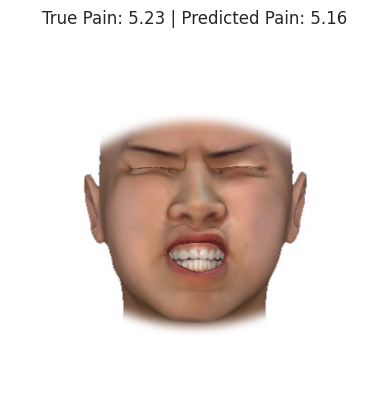

In [23]:
def predict_random_image(model_path, test_data, transform, device):
    model = models.resnet18(pretrained=True)
    model.fc = torch.nn.Linear(model.fc.in_features, 1)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()

    random_idx = random.randint(0, len(test_data) - 1)
    img_path, true_label = test_data[random_idx]

    original_image = Image.open(img_path).convert('RGB')
    transformed_image = transform(original_image).unsqueeze(0).to(device)

    with torch.no_grad():
        predicted_label = model(transformed_image)
        predicted_label = predicted_label.item()

    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"True Pain: {true_label:.2f} | Predicted Pain: {predicted_label:.2f}")
    plt.show()

predict_random_image(MODEL_SAVE_PATH, test_data, transform, device)


# **d√πng tensorflow**

# **pain_labels.csv**

S·ª≠ d·ª•ng face_features: ['Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise', 'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft', 'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold', 'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight', 'LookUp', 'aah', 'big aah', 'ee', 'eh', 'i', 'K', 'N', 'oh', 'R', 'th', 'W']
T·ªïng ·∫£nh h·ª£p l·ªá: 128
Train: 88 | Val: 16 | Test: 24
Epoch 1/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 521ms/step - loss: 4.3297 - mae: 4.8296
Epoch 1: val_loss improved from inf to 1.43975, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 3s/step - loss: 4.2097 - mae: 4.7096 - val_loss: 1.4398 - val_mae: 1.9398 - learning_rate: 0.0010
Epoch 2/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 527ms/step - loss: 1.1889 - mae: 1.6534
Epoch 2: val_loss improved from 1.43975 to 0.48292, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 978ms/step - loss: 1.1746 - mae: 1.6340 - val_loss: 0.4829 - val_mae: 0.9642 - learning_rate: 0.0010
Epoch 3/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 494ms/step - loss: 1.2756 - mae: 1.7089
Epoch 3: val_loss improved from 0.48292 to 0.18644, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 916ms/step - loss: 1.2576 - mae: 1.6908 - val_loss: 0.1864 - val_mae: 0.5554 - learning_rate: 0.0010
Epoch 4/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 497ms/step - loss: 0.8468 - mae: 1.2393
Epoch 4: val_loss did not improve from 0.18644
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 682ms/step - loss: 0.8540 - mae: 1.2506 - val_loss: 1.0651 - val_mae: 1.5651 - learning_rate: 0.0010
Epoch 5/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 868ms/step - loss: 0.8068 - mae: 1.2288
Epoch 5: val_loss did not improve from 0.18644
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1s/step - loss: 0.8029 - mae: 1.2244 - val_loss: 0.5024 - val_mae: 0.9783 - learning_rate: 0.0010
Epoch 6/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 500ms/step - loss: 0.7515 - mae: 1.1477
Epoch 6: val_loss improved from 0.18644 to

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 906ms/step - loss: 0.7548 - mae: 1.1519 - val_loss: 0.0640 - val_mae: 0.3315 - learning_rate: 0.0010
Epoch 7/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 487ms/step - loss: 0.6928 - mae: 1.0808
Epoch 7: val_loss did not improve from 0.06402
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 660ms/step - loss: 0.6867 - mae: 1.0776 - val_loss: 0.3163 - val_mae: 0.7551 - learning_rate: 0.0010
Epoch 8/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 489ms/step - loss: 0.5465 - mae: 0.9561
Epoch 8: val_loss did not improve from 0.06402
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 664ms/step - loss: 0.5458 - mae: 0.9556 - val_loss: 0.8708 - val_mae: 1.3686 - learning_rate: 0.0010
Epoch 9/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 492ms/step - loss: 0.6296 - mae: 1.0404
Epoch 9: val_loss did not improve from 

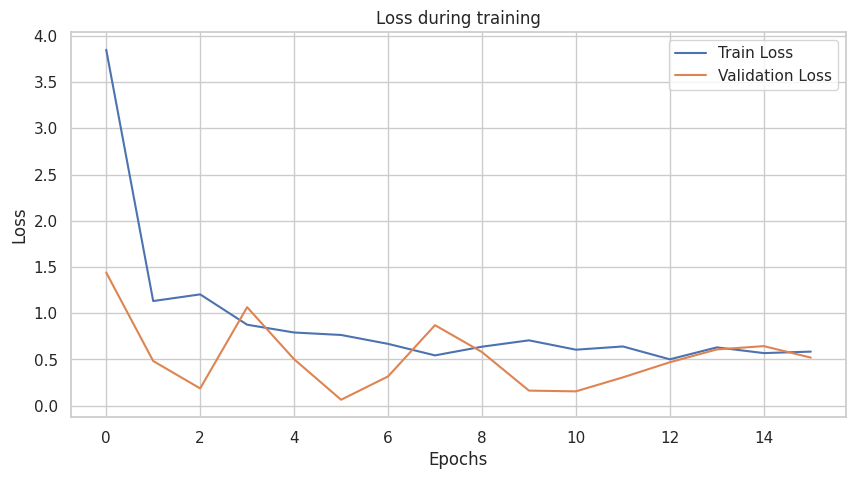

In [88]:
import os  # Duy·ªát file v√† th∆∞ m·ª•c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.losses import Huber

# B∆Ø·ªöC 1: ƒê∆Ø·ªúNG D·∫™N
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv"

# B∆Ø·ªöC 2: ƒê·ªåC CSV & CHU·∫®N H√ìA
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]
# L·ªçc c√°c c·ªôt th·ª±c s·ª± t·ªìn t·∫°i
face_features = [col for col in face_features if col in df.columns]
print("S·ª≠ d·ª•ng face_features:", face_features)

df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# B∆Ø·ªöC 3: LOAD D·ªÆ LI·ªÜU
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            if "_" in img_name:
                image_file_part = img_name.split("_")[-1]
                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0
                        emotion_data = label_row[emotion_features].values[0]
                        face_data = label_row[face_features].values[0]
                        pain = label_row['PainRating'].values[0]
                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)
                        folder_name = os.path.basename(os.path.dirname(img_path))
                        img_folder_names.append(folder_name)
                    except Exception as e:
                        print(f"‚ùå L·ªói x·ª≠ l√Ω ·∫£nh {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)
print("T·ªïng ·∫£nh h·ª£p l·ªá:", len(X_img))

# B∆Ø·ªöC 4: CHIA D·ªÆ LI·ªÜU (THEO TH∆Ø M·ª§C)
all_folders = sorted(set(img_folder_names))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

def split_by_folder(folders, img_folders, *arrays):
    results = [[] for _ in arrays]
    for i, folder in enumerate(img_folders):
        if folder in folders:
            for res, arr in zip(results, arrays): res.append(arr[i])
    return map(np.array, results)

X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)
print("Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# B∆Ø·ªöC 5: X√ÇY D·ª∞NG M√î H√åNH (MULTI-INPUT)
img_input = Input(shape=(128,128,3), name='ImageInput')
x = preprocess_input(img_input)
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
base_model.trainable = False
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
e = Dense(128, activation='relu')(emotion_input)
e = Dropout(0.3)(e)
e = Dense(64, activation='relu')(e)

face_input = Input(shape=(len(face_features),), name='FaceInput')
f = Dense(128, activation='relu')(face_input)
f = Dropout(0.3)(f)
f = Dense(64, activation='relu')(f)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.4)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.2)(z)
output = Dense(1, name='PainOutput')(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

# B∆Ø·ªöC 6: TRAIN M√î H√åNH
# Kh·ªüi t·∫°o c√°c callback ƒë·ªÉ h·ªó tr·ª£ qu√° tr√¨nh hu·∫•n luy·ªán:
# callbacks = [
#     EarlyStopping(
#         monitor='val_loss',    # Theo d√µi gi√° tr·ªã validation loss
#         patience=10,           # N·∫øu 10 epoch li√™n ti·∫øp kh√¥ng gi·∫£m -> d·ª´ng s·ªõm
#         restore_best_weights=True  # Ph·ª•c h·ªìi l·∫°i tr·ªçng s·ªë t·ªët nh·∫•t
#     ),
#     ReduceLROnPlateau(
#         monitor='val_loss',    # Theo d√µi gi√° tr·ªã validation loss
#         factor=0.5,            # N·∫øu loss kh√¥ng gi·∫£m, gi·∫£m learning rate ƒëi 1/2
#         patience=5,            # Sau 5 epoch kh√¥ng c·∫£i thi·ªán th√¨ gi·∫£m
#         verbose=1              # In ra th√¥ng b√°o khi learning rate thay ƒë·ªïi
#     )
# ]

# ƒê·ªãnh nghƒ©a callbacks m·ªõi: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_pain_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m√¥ h√¨nh
history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# B∆Ø·ªöC 7: ƒê√ÅNH GI√Å M√î H√åNH
test_loss, test_mae = model.evaluate(
    [X_img_test, X_emo_test, X_face_test], y_test,
    verbose=1
)
print(f"Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# B∆Ø·ªöC 8: V·∫º BI·ªÇU ƒê·ªí LOSS/MAE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# N·∫øu c·∫ßn v·∫Ω th√™m MAE, b·∫°n c≈©ng c√≥ th·ªÉ th√™m:
# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step


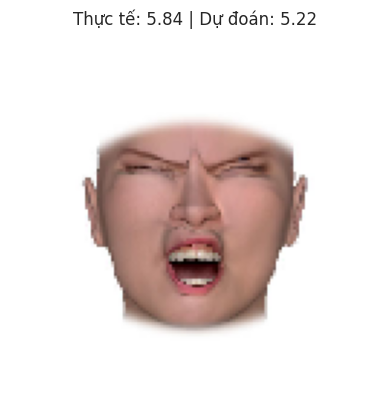

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 72ms/step


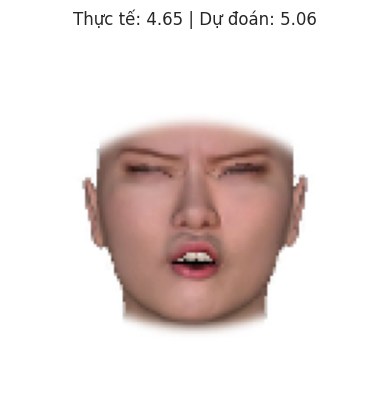

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 74ms/step


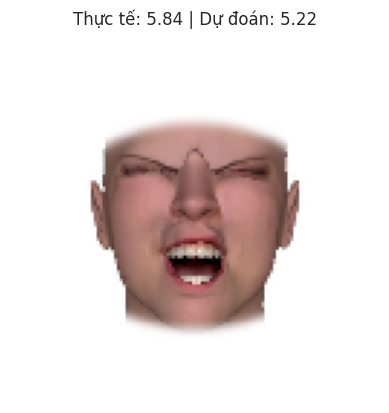

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 67ms/step


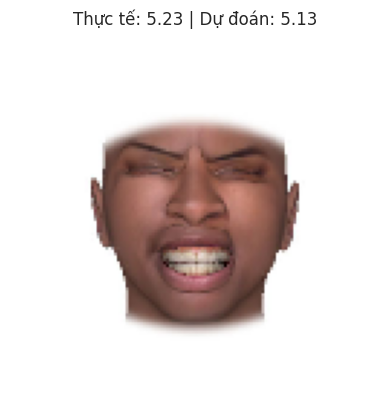

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 77ms/step


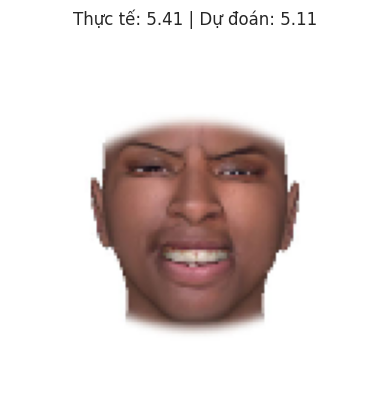

In [87]:
import random

for _ in range(5):  # test 5 m·∫´u random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Th·ª±c t·∫ø: {y_test[idx]:.2f} | D·ª± ƒëo√°n: {pred:.2f}")
    plt.show()


Chuy·ªÉn merged_output.xlsx sang output.xlsx

In [ ]:
import pandas as pd

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn t·ªáp .xlsx
input_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx'  # Thay b·∫±ng ƒë∆∞·ªùng d·∫´n t·ªáp c·ªßa b·∫°n
output_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx'  # T√™n t·ªáp .csv ƒë·∫ßu ra


# ƒê·ªçc t·ªáp .xlsx
df = pd.read_excel(input_file)

df = df.drop(columns=['ResponseId'])

df.head()

# L∆∞u d∆∞·ªõi d·∫°ng .csv
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"ƒê√£ chuy·ªÉn ƒë·ªïi {input_file} sang {output_file}")


ƒê√£ chuy·ªÉn ƒë·ªïi /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx sang /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# T√πy ch·ªânh ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

Mounted at /content/drive


# **output.csv**

# **d√πng tensorflow**

In [ ]:
import os  # Duy·ªát file v√† th∆∞ m·ª•c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.losses import Huber

# B∆Ø·ªöC 1: ƒê∆Ø·ªúNG D·∫™N
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.csv"

# B∆Ø·ªöC 2: ƒê·ªåC CSV & CHU·∫®N H√ìA
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]
# L·ªçc c√°c c·ªôt th·ª±c s·ª± t·ªìn t·∫°i
face_features = [col for col in face_features if col in df.columns]
print("S·ª≠ d·ª•ng face_features:", face_features)

df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# B∆Ø·ªöC 3: LOAD D·ªÆ LI·ªÜU
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            if "_" in img_name:
                image_file_part = img_name.split("_")[-1]
                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0
                        emotion_data = label_row[emotion_features].values[0]
                        face_data = label_row[face_features].values[0]
                        pain = label_row['PainRating'].values[0]
                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)
                        folder_name = os.path.basename(os.path.dirname(img_path))
                        img_folder_names.append(folder_name)
                    except Exception as e:
                        print(f"‚ùå L·ªói x·ª≠ l√Ω ·∫£nh {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)
print("T·ªïng ·∫£nh h·ª£p l·ªá:", len(X_img))

# B∆Ø·ªöC 4: CHIA D·ªÆ LI·ªÜU (THEO TH∆Ø M·ª§C)
all_folders = sorted(set(img_folder_names))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

def split_by_folder(folders, img_folders, *arrays):
    results = [[] for _ in arrays]
    for i, folder in enumerate(img_folders):
        if folder in folders:
            for res, arr in zip(results, arrays): res.append(arr[i])
    return map(np.array, results)

X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)
print("Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# B∆Ø·ªöC 5: X√ÇY D·ª∞NG M√î H√åNH (MULTI-INPUT)
img_input = Input(shape=(128,128,3), name='ImageInput')
x = preprocess_input(img_input)
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
base_model.trainable = False
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
e = Dense(128, activation='relu')(emotion_input)
e = Dropout(0.3)(e)
e = Dense(64, activation='relu')(e)

face_input = Input(shape=(len(face_features),), name='FaceInput')
f = Dense(128, activation='relu')(face_input)
f = Dropout(0.3)(f)
f = Dense(64, activation='relu')(f)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.4)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.2)(z)
output = Dense(1, name='PainOutput')(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

# B∆Ø·ªöC 6: TRAIN M√î H√åNH
# Kh·ªüi t·∫°o c√°c callback ƒë·ªÉ h·ªó tr·ª£ qu√° tr√¨nh hu·∫•n luy·ªán:
# callbacks = [
#     EarlyStopping(
#         monitor='val_loss',    # Theo d√µi gi√° tr·ªã validation loss
#         patience=10,           # N·∫øu 10 epoch li√™n ti·∫øp kh√¥ng gi·∫£m -> d·ª´ng s·ªõm
#         restore_best_weights=True  # Ph·ª•c h·ªìi l·∫°i tr·ªçng s·ªë t·ªët nh·∫•t
#     ),
#     ReduceLROnPlateau(
#         monitor='val_loss',    # Theo d√µi gi√° tr·ªã validation loss
#         factor=0.5,            # N·∫øu loss kh√¥ng gi·∫£m, gi·∫£m learning rate ƒëi 1/2
#         patience=5,            # Sau 5 epoch kh√¥ng c·∫£i thi·ªán th√¨ gi·∫£m
#         verbose=1              # In ra th√¥ng b√°o khi learning rate thay ƒë·ªïi
#     )
# ]

# ƒê·ªãnh nghƒ©a callbacks m·ªõi: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_pain_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m√¥ h√¨nh
history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# B∆Ø·ªöC 7: ƒê√ÅNH GI√Å M√î H√åNH
test_loss, test_mae = model.evaluate(
    [X_img_test, X_emo_test, X_face_test], y_test,
    verbose=1
)
print(f"Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# B∆Ø·ªöC 8: V·∫º BI·ªÇU ƒê·ªí LOSS/MAE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# N·∫øu c·∫ßn v·∫Ω th√™m MAE, b·∫°n c≈©ng c√≥ th·ªÉ th√™m:
# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')


In [ ]:
import random

for _ in range(5):  # test 5 m·∫´u random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Th·ª±c t·∫ø: {y_test[idx]:.2f} | D·ª± ƒëo√°n: {pred:.2f}")
    plt.show()


# **Clean DelawarePainDatabase_StimulusCharacterization_forOSF.xlsx**


In [16]:
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_StimulusCharacterization_forOSF.xlsx"
xls = pd.ExcelFile(file_path)

df_RawNeutralData_DPD = pd.read_excel(xls, sheet_name="RawNeutralData_DPD")

df_RawNeutralData_DPD.info()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Columns: 7530 entries, RecordedDate to Unnamed: 7529
dtypes: datetime64[ns](1), float64(6856), int64(1), object(672)
memory usage: 35.4+ MB
